# 超市订购单明细分析

## 一.超市订购单明细数据初步处理

 <font color=black size=4>&emsp;&emsp;利用python导入原表item，观察到共有订购交易记录1732761项，超市订够指标列分别表示交易时间、商店编码、POS机编码、商品栏编码、商品编码、购买商品数量、购买实际金额、正常购买金额、折扣类型和折扣金额。本报告首先根据指标列对存在不合理的交易记录进行初步处理，并对存在问题的交易记录进行更正及删除。   
 <font color=black size=4>&emsp;&emsp;首先导入numpy包和pandas方便下一步对数据集操作分析，len函数可以查看交易明细数据的总体交易记录，如下显示2018年6月1日-2018年7月5日各门店超市共有交易记录1732761条。item表显示交易明细共有10个指标来记录交易情况。   

In [1]:
#初步处理数据
import numpy as np
import pandas as pd
item= pd.read_csv("c:\\users\\lenovo\\item-2018-06-01-2018-07-05.csv",header=0)

In [2]:
#读取订购单明细总体记录数目
len(item)

1732761

In [3]:
#读取item表
item

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
0,2018-06-01,D007,3,250451,29405,1.000,1.70,2.0,m,-0.30
1,2018-06-01,D007,3,250451,13187,1.000,1.00,1.0,n,0.00
2,2018-06-01,D007,3,250243,196249,1.000,99.00,99.0,m,0.00
3,2018-06-01,D007,3,250243,199637,1.000,9.90,16.8,p,-6.90
4,2018-06-01,D007,1,160905,195012,3.222,18.69,5.8,n,0.00
5,2018-06-01,D007,1,160905,194904,3.522,35.22,10.0,n,0.00
6,2018-06-01,D007,3,250458,56371,1.000,8.00,8.0,n,0.00
7,2018-06-01,D007,3,250241,75124,12.000,30.00,2.5,n,0.00
8,2018-06-01,D007,8,5346,195988,1.000,4.90,5.8,m,-0.90
9,2018-06-01,D007,8,5346,3096,1.000,8.90,12.9,p,-4.00


### 1.交易数量问题

<font color=black size=4>&emsp;&emsp;如下表所示，超市交易明细中记录2022条的交易数目存在问题，问题在于交易数量为负值。按照实际交易情况分析，交易数目应为非负数，因此本报告将2022条明细记录中的交易数量更正为正数，更新item表。

In [4]:
#表中筛选出ITEM_QUANTITY小于0的异常值
item[item['ITEM_QUANTITY']<0]

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
2069,2018-06-01,D005,2,204868,223630,-9.000,-9.00,1.7,m,6.30
3685,2018-06-01,D002,20,13408,222965,-1.000,-44.00,49.0,p,5.00
4024,2018-06-01,D002,20,13397,223051,-1.000,-15.00,19.0,p,4.00
4025,2018-06-01,D002,20,13397,224139,-1.000,-12.90,19.0,p,6.10
4911,2018-06-01,D008,1,197331,77976,-1.000,-20.90,27.8,p,6.90
5857,2018-06-01,D002,20,13399,223624,-2.000,-38.00,29.0,p,20.00
7100,2018-06-01,A019,1,191967,5144,-1.000,-25.90,25.9,n,0.00
7373,2018-06-01,D009,2,15841,114749,-1.000,-39.90,39.9,n,0.00
10933,2018-06-01,D003,2,53169,215840,-1.000,-3.68,4.9,v,1.22
12000,2018-06-01,D009,3,144531,60840,-0.758,-11.98,18.0,p,1.66


In [5]:
#处理商品数量值为负的异常值，改为正数,更新item表
item['ITEM_QUANTITY']=abs(item['ITEM_QUANTITY'])
#item
#item[item['ITEM_QUANTITY']<0]

### 2.实际交易金额问题

<font color=black size=4>&emsp;&emsp;各商店实际交易金额并存在与以上与交易数量相同的问题，即实际交易金额存在负数的情况为2020条明细，观察处理数据发现交易数量与实际交易金额均为负值可能导致异常实际折扣数值异常，因此本次在python中对存在负值问题的数据进行了绝对值处理，将其同样更正为正值。 
    
<font color=black size=4>&emsp;&emsp;如下表所示，通过数据显示在交易记录明细当中有636条交易记录的实际交易金额为0元，且折扣类型都为Q。且对交易日期重新排序后显示，记录在册的各超市商店在2018年6月1日—2018年7月4日期间对部分商品进行全折销售,7月5日各商店免费活动结束。

In [6]:
#将实际交易金额小于0的异常记录更正，负值更正为正值
item['ITEM_SPEND']=abs(item['ITEM_SPEND'])
#item[item['ITEM_SPEND']<0]

In [7]:
#筛选出实际交易金额等于0的交易记录，发现折扣类型为q，有633条商品进行免费赠送
item_freespend=item[item['ITEM_SPEND']==0]
item_freespend['SDATE']=sorted(item_freespend['SDATE'])
item_freespend

D:\aaaaaaa\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
14443,2018-06-01,A001,2,125658,188176,1.0,0.0,98.0,q,-98.0
39292,2018-06-01,A013,1,26247,194882,1.0,0.0,128.0,q,-128.0
43866,2018-06-01,A013,2,194793,199802,1.0,0.0,92.0,q,-92.0
46013,2018-06-01,A013,2,194818,199802,1.0,0.0,92.0,q,92.0
46537,2018-06-01,A009,2,50770,212070,1.0,0.0,4.0,q,-4.0
57362,2018-06-01,A013,2,194855,199802,1.0,0.0,92.0,q,-92.0
59582,2018-06-02,A013,2,194653,199802,1.0,0.0,92.0,q,-92.0
59664,2018-06-02,A016,1,78453,212070,1.0,0.0,4.0,q,-4.0
86230,2018-06-02,D007,3,251219,218088,1.0,0.0,99.0,q,-99.0
113881,2018-06-03,D005,2,207746,212069,1.0,0.0,3.5,q,-3.5


### 3.折扣金额问题

<font color=black size=4>&emsp;&emsp;由于交易数量以及实际交易金额出现问题，本次对折扣金额也同样做出对比计算来验证再计算折扣金额和实际各商店记录折扣金额是否存在出入。本次通过简单计算编写算式表达式重新计算折扣金额，表达式为实际交易金额=交易数量*正常交易金额，且按照大多数商店计数规则保留2位小数。
对前步骤更改过后，结果对比发现在1732761项交易记录明细当中有6524条记录存在不对等的情况。经过初步分析导致DISCOUNT_AMOUNT和RDISCOUNT_AMOUNT不对等的原因有三类：

In [8]:
#重新计算各商品折扣价格，添加列REDISCOUNT_AMOUNT
item['REDISCOUNT_AMOUNT']=round(item['ITEM_SPEND']-round(item['ITEM_QUANTITY']*item['NORMAL_PRICE'],2),2)
#item
#diff1 = set(item['REDISCOUNT_AMOUNT']).difference(item['DISCOUNT_AMOUNT'])
#item['diff']=item['REDISCOUNT_AMOUNT']-item['DISCOUNT_AMOUNT'

# DISCOUNT_AMOUNT和RDISCOUNT_AMOUNT不对等的记录
differentdiscount= item.loc[(item['DISCOUNT_AMOUNT']!=item['REDISCOUNT_AMOUNT'])]
differentdiscount

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT,REDISCOUNT_AMOUNT
383,2018-06-01,D008,4,17893,113167,0.128,12.30,96.0,n,0.00,0.01
384,2018-06-01,D008,4,17893,29318,0.282,6.10,21.6,n,0.00,0.01
385,2018-06-01,D008,4,17893,149763,0.163,8.10,49.6,n,0.00,0.02
392,2018-06-01,D008,1,197203,71433,0.562,29.20,52.0,n,0.00,-0.02
393,2018-06-01,D008,1,197203,71421,0.450,20.50,45.6,n,0.00,-0.02
394,2018-06-01,D008,1,197203,72779,0.270,36.70,136.0,n,0.00,-0.02
395,2018-06-01,D008,1,197203,186467,0.290,34.70,119.8,n,0.00,-0.04
403,2018-06-01,D008,1,197148,212212,0.723,18.50,25.6,n,0.00,-0.01
404,2018-06-01,D008,1,197148,135424,1.149,34.00,29.6,n,0.00,-0.01
452,2018-06-01,D008,1,197434,21878,0.330,18.40,55.8,n,0.00,-0.01


#### （1）各商店计算折扣价格计数问题

<font color=black size=4>&emsp;&emsp;如下表所示，可以明显地看到DISCOUNT_AMOUNT和RDISCOUNT_AMOUNT这两列不相等，原因在于第383条记录编码为D008的 商店对17893栏113167商品计算折扣价格时保留一位小数点引发的差异。

In [9]:
differentdiscount.iloc[1]

SDATE                2018-06-01
STORE_CODE                 D008
POSID                         4
BASK_CODE                 17893
PROD_CODE                 29318
ITEM_QUANTITY             0.282
ITEM_SPEND                  6.1
NORMAL_PRICE               21.6
DISCOUNT_TYPE                 n
DISCOUNT_AMOUNT               0
REDISCOUNT_AMOUNT          0.01
Name: 384, dtype: object

#### （2）商店记录折扣价格时，记录方式不统一

<font color=black size=4>&emsp;&emsp;数据交易明细中DISCOUNT_AMOUNT存在两种记录方式，例如折扣价格-40和40元，因此在数据进入下一步分析应统一记录方式。


In [10]:
differentdiscount.iloc[6523]

SDATE                2018-07-05
STORE_CODE                 A010
POSID                         2
BASK_CODE                284624
PROD_CODE                223730
ITEM_QUANTITY                 1
ITEM_SPEND                   69
NORMAL_PRICE                109
DISCOUNT_TYPE                 p
DISCOUNT_AMOUNT              40
REDISCOUNT_AMOUNT           -40
Name: 1731893, dtype: object

#### （3）交易明细记录错误

<font color=black size=4>&emsp;&emsp;例如下图为2018年7月5日商店A018售卖215524栏29318商品的交易记录，其折扣金额为-1440元，明显出现记录失误，对于此类情况应予以删除此类记录的处理。

In [11]:
differentdiscount.iloc[6509]

SDATE                2018-07-05
STORE_CODE                 A018
POSID                         4
BASK_CODE                  8595
PROD_CODE                177974
ITEM_QUANTITY                10
ITEM_SPEND                  160
NORMAL_PRICE                160
DISCOUNT_TYPE                 n
DISCOUNT_AMOUNT               0
REDISCOUNT_AMOUNT         -1440
Name: 1729713, dtype: object

## 二、超市交易明细指标列分析

<font color=black size=4>&emsp;&emsp;购物明细包括顾客购买商品及各商店门店编号和商品信息真实记录，因此此部分未对交易数据进行异常值处理，以免漏失信息。本报告对超市交易明细记录指标（交易记录时间、商店编码情况、pos机使用情况、购物篮编码情况、商品编码情况）做出统计分析，以期得到客人购买流量的最佳时期，以及热卖商品的需求情况和冷门商品的具体销售数量分析，为超市做出合理市场分析提出建设性建议。

In [12]:
#导入绘图相关包
%matplotlib inline
import matplotlib as mpl
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt 
import pandas
import sympy
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False


### 1.交易记录时间范围

<font color=black size=4>&emsp;&emsp;原交易明细共有1732761项，按照时间对每条记录进行排序发现交易明细记录了在2018年6月1日-2018年7月5日的35天各商店交易情况。其中2018年6月1-2018年7月5日的交易按天交易明细计数统计图。
    
<font color=black size=4>&emsp;&emsp;如图中显示，2018年6月1日-7月5日商店交易数量呈现上下波动的情况，基本呈现“A”字形趋势。6月1日后商品交易次数下降，7日起交易次数回升，直到2018年6月17日左右到达顶峰87180次。19日出现了日交易数量最低点32485次，低估过后日交易次数有所轻微回升，但总体数量明显低于17日之前的交易数量。从以上趋势变动及数据分析，各商店应做好对商品需求的管控工作。日交易高峰期不久出现了低谷期，超市应及时处理滞销商品，提前进行合理规划。     
    


Text(0.5,1,'2018年6月1日—2018年7月5日商品交易情况图')

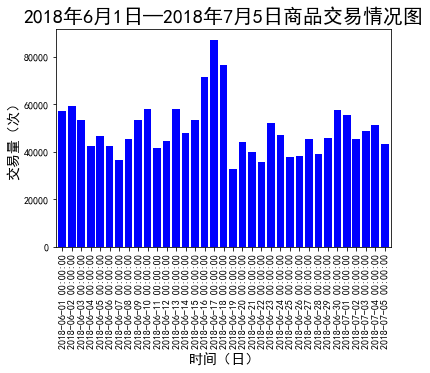

In [13]:
#item表交易时间升序排序
item['SDATE'] = pd.to_datetime(item['SDATE'])
item['SDATE']=sorted(item['SDATE'])
#2018年6月1日-2018年7月25日每天交易记录的个数
timenumber=item['SDATE'].value_counts()

#绘制商品日交易情况直方图
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
timenumber.sort_index().plot.bar(width=0.8,color="blue", alpha=1)
plt.xlabel('时间（日）',fontsize=14) #绘制x轴
plt.ylabel('交易量（次）',fontsize=14) #绘制y轴
plt.title(r'2018年6月1日—2018年7月5日商品交易情况图',fontsize=20)
#timenumber.sort_index()

### 2.商店编号情况

<font color=black size=4>&emsp;&emsp;编码为A类的商店有15家，02、03、05、11、14、15、20商店的交易记录没有记录在商店内。编码为D类的商店共9家，其中01商店的交易记录无法得知。商店D002及A001分别为销售第一、二的热门商店、最为冷清的商店为D003。6月1日—7月5日销售记录破10万的门店分别为D002、A001、D007、A008四家。

A001    193822
A004     46005
A006     77906
A007     49326
A008    106171
A009     56326
A010     49291
A012     63749
A013     81522
A016     56266
A017     28789
A018     46569
A019     51289
A021     62889
A022     44130
D002    242492
D003     22249
D004     76548
D005     50408
D006     70071
D007    117804
D008     59282
D009     45032
D010     34825
Name: STORE_CODE, dtype: int64


Text(0.5,1,'各商店交易情况图')

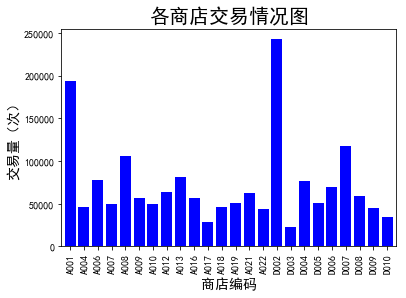

In [14]:
#商店编码统计STORE_CODE
storecodenumber=item['STORE_CODE'].value_counts()
print(storecodenumber.sort_index())

storecodenumber.sort_index().plot.bar(width=0.8,color="blue", alpha=1)
plt.xlabel('商店编码',fontsize=14) #绘制x轴
plt.ylabel('交易量（次）',fontsize=14) #绘制y轴
plt.title(r'各商店交易情况图',fontsize=20)

### 3.POS机使用情况

<font color=black size=4>&emsp;&emsp;POS机情况图描述了各商店对不同编号的POS机使用情况，所有交易明细当中记录了1-10、13、19、20号POS机的交易情况，1号和2号POS机的使用次数多于其他机器。

1     485377
2     526229
3     311576
4      95053
5      47582
6     121539
7       4861
8      57548
9      52657
10      3306
13     24522
19       760
20      1751
Name: POSID, dtype: int64


Text(0.5,1,'POS机交易情况图')

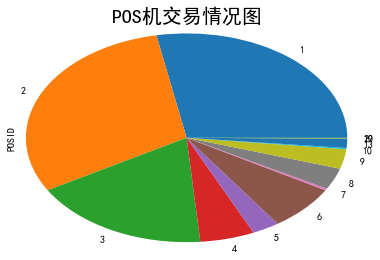

In [15]:
#POSID机
posnumber=item['POSID'].value_counts()
pd.set_option('display.max_columns',281211)
print(posnumber.sort_index())
#绘制pos机饼图
posnumber.sort_index().plot.pie(radius=1.2)
plt.title(r'POS机交易情况图',fontsize=20)

### 4.购物篮及商品情况

 <font color=black size=4>&emsp;&emsp;根据统计计数所有商店有281211个不同的购物篮，若每个购物篮代表一名客人发生交易，则35天内共有281211名客人来店购买商品。超市有不同种类商品19271件，编号为205540的商品为最受欢迎的商品，它的销售量为12622件；其次编号为21835的商品销售排第二，仅次销售第一商品2163件；销售第三的商品编码为194690，销售量达到9545件。
    
<font color=black size=4>&emsp;&emsp; A，B，C，D，E五种等级，E表示销售数量低于100的商品为最不受欢迎的产品，此类产品可通过调换同类欢迎度较较高的商品等方法提高商品销量，以及对冷门不必要的商品采取不进货等处理。D表示销售数量较低的商品，对于此类商品可采用店内活动等方式带动促销。C代表受欢迎度等级为“中”的商品，B和A类商品为销售水平为“较高”，“高”的商品，商店应保证这两类商品的供应数量，防止供不应求的现象出现。
    
 <font color=black size=4>&emsp;&emsp; 根据各商品销量饼图可以显示出，“E”类商品销售数量占总体90.66%，就给定交易明细数据而言超市运营并不乐观，极为受欢迎的商品，较受欢迎的商品，一般受欢迎的商品仅占总商品销售数量的10%。超市应采取更加有效的管理策略及运营手段来增加销售量高的商品占比以此提高盈利利润。

In [30]:
#
#商品栏BASK_CODE
baskcodenumber=item['BASK_CODE'].value_counts()
#商品编码信息
pronumber=item['PROD_CODE'].value_counts()  
len(pronumber)
prod_order_count=pronumber
dict_prod_count = {'prod_id':prod_order_count.index,'Count':prod_order_count.values}
df = pd.DataFrame(dict_prod_count)
bins = pd.IntervalIndex.from_tuples([(0,100),(101, 1000), (1001, 5000), (5001, 10000),(10001,np.max(df["Count"]) + 1)], closed='left')
a = ('E','D','C','B','A')
df['new'] = np.array(a)[pd.cut(df["Count"], bins = bins).cat.codes]

#print(df)
df1=df.loc[df['new'].str.contains('A')]
df2=df.loc[df['new'].str.contains('B')]
df3=df.loc[df['new'].str.contains('C')]
df4=df.loc[df['new'].str.contains('D')]
df5=df.loc[df['new'].str.contains('E')]
len(df5)

15924

   A   B    C     D      E
0  2  13  258  3051  15924


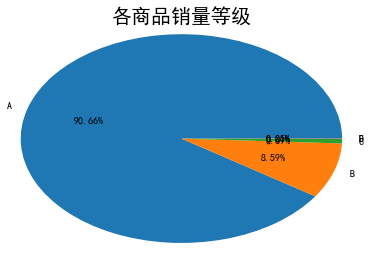

In [35]:
#
pro_grade=pd.DataFrame(
               {"A":[2],
                "B":[13],
                'C':[258],
                'D':[3051],
                'E':[15924]}
               )
print(pro_grade)

#绘制各商品销量等级图
labels=['A','B','C','D','E']
X=[15924, 1509, 121, 8 ,2] 
 
fig = plt.figure()
plt.pie(X,labels=labels,radius=1.2,autopct='%1.2f%%') #画饼图（数据，数据对应的标签，百分数保留两位小数点）
plt.title("各商品销量等级",fontsize=20)
plt.show() 

<font color=black size=4>&emsp;&emsp;下列表代表编码为A和D的所有商店销售数量最高的商品，例如A010商店销量最高的前三商品为4463,86772,194122；D010商店销售量最高的前三商品为86772,217998,1152。

In [36]:
#编码为A的商店，最高销售产品
A010=item[item["STORE_CODE"].isin(['A010'])]
A010.groupby('PROD_CODE')['ITEM_QUANTITY'].sum().reset_index().sort_values(by = 'ITEM_QUANTITY',ascending = False).head(3)

,PROD_CODE,ITEM_QUANTITY
482,4463,1594.0
1770,86772,1437.0
3172,194122,1412.0


In [39]:
#编码为D的商店，最高销售产品
D010=item[item["STORE_CODE"].isin(['D010'])]

D010.groupby('PROD_CODE')['ITEM_QUANTITY'].sum().reset_index().sort_values(by = 'ITEM_QUANTITY',ascending = False).head(3)

,PROD_CODE,ITEM_QUANTITY
1397,86772,798.0
3247,217998,541.0
101,1152,496.0


In [ ]:
storecodenumber=item['STORE_CODE'].value_counts().sort_index()
storecodenumber.keys()